In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
from collections import Counter
df = pd.read_csv(r"C:/Users/User/Downloads/F1DriversDataset.csv")

df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


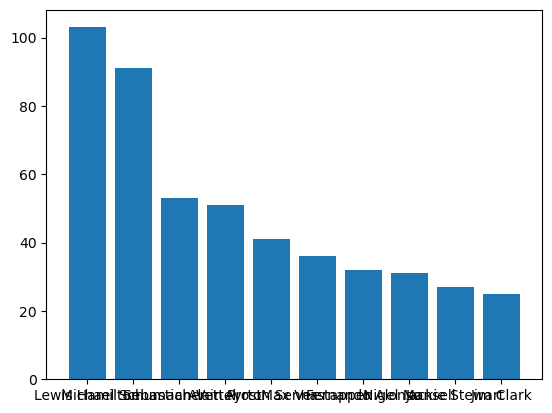

In [15]:
df = df.sort_values(by="Race_Wins", ascending=False)

plt.bar(df['Driver'].head(10), df['Race_Wins'].head(10))
plt.show()

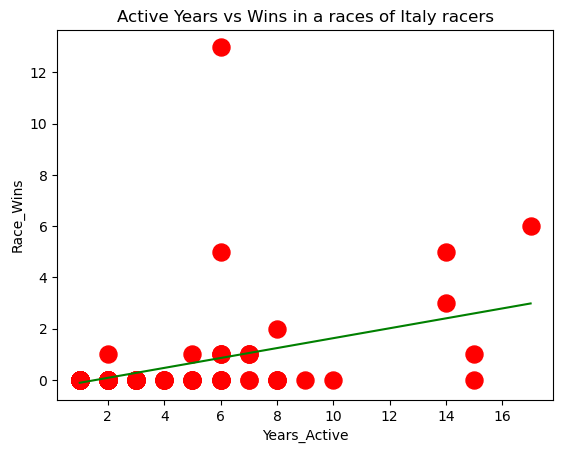

In [16]:
bayern = df[df['Nationality'] == 'Italy']
bayern = bayern.sort_values(by="Years_Active", ascending=False)

slope, intercept, r, p, std_err = stats.linregress(bayern['Years_Active'], bayern['Race_Wins'])
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, bayern['Years_Active']))
plt.scatter(bayern['Years_Active'], bayern['Race_Wins'], s = 150, c = 'red')
plt.plot(bayern['Years_Active'], mymodel, c = 'green')
plt.xlabel('Years_Active')
plt.ylabel('Race_Wins')
plt.title('Active Years vs Wins in a races of Italy racers')
plt.show()

In [17]:
nations = Counter(df['Nationality'])
nations

Counter({'United Kingdom': 164,
         'United States': 160,
         'Italy': 99,
         'France': 72,
         'West Germany': 39,
         'Brazil': 32,
         'Argentina': 25,
         'Switzerland': 24,
         'South Africa': 23,
         'Belgium': 23,
         'Japan': 21,
         'Australia': 18,
         'Netherlands': 16,
         'Austria': 16,
         'Spain': 15,
         'Canada': 15,
         'Germany': 14,
         'Sweden': 11,
         'Finland': 9,
         'New Zealand': 9,
         'Mexico': 6,
         'Denmark': 5,
         'Portugal': 5,
         'Ireland': 5,
         'Monaco': 4,
         'Rhodesia': 4,
         'Uruguay': 4,
         'Colombia': 3,
         'Venezuela': 3,
         'Russia': 3,
         'East Germany': 3,
         'India': 2,
         'Thailand': 2,
         'Poland': 1,
         'Liechtenstein': 1,
         'RAF': 1,
         'Malaysia': 1,
         'China': 1,
         'Chile': 1,
         'Monaco\xa0Netherlands': 1,
         'Cze

In [18]:
nations1 = ['United Kingdom', 'United States', 'Italy']
nations2 = {key: nations[key] for key in nations1}

total = len(df['Nationality'])
percentage = {key: nations2[key] / total * 100 for key in nations2}
sums = sum(percentage.values())
others = 100 - sums
result = {key: percentage[key] for key in percentage}
result['Others'] = others
result

{'United Kingdom': 18.89400921658986,
 'United States': 18.433179723502306,
 'Italy': 11.405529953917052,
 'Others': 51.267281105990776}

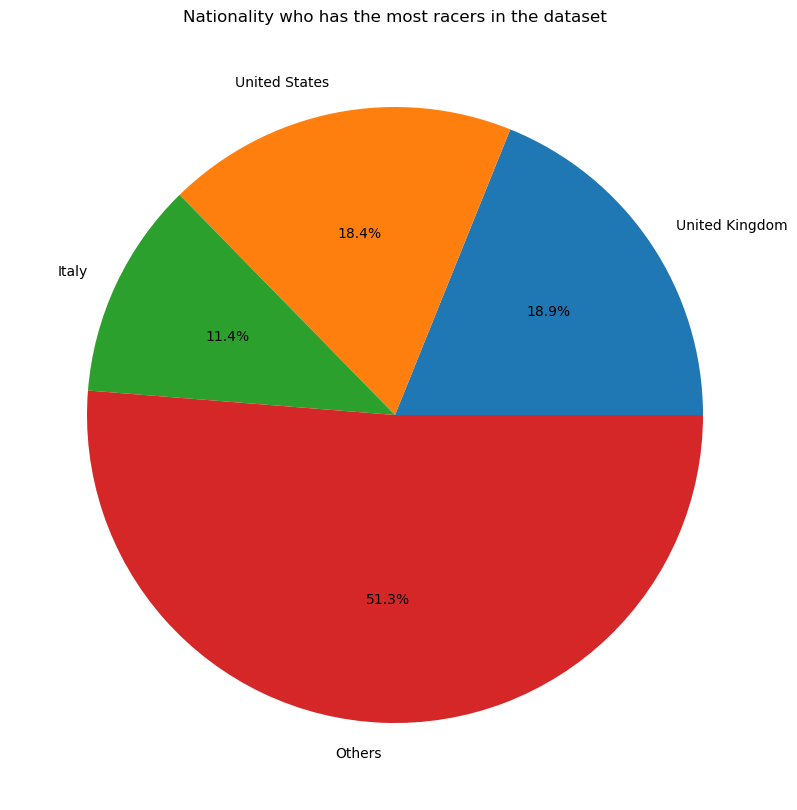

In [19]:
plt.figure(figsize=(10, 10))
plt.pie(result.values(), labels=result.keys(), autopct='%1.1f%%')
plt.title('Nationality who has the most racers in the dataset')
plt.show()

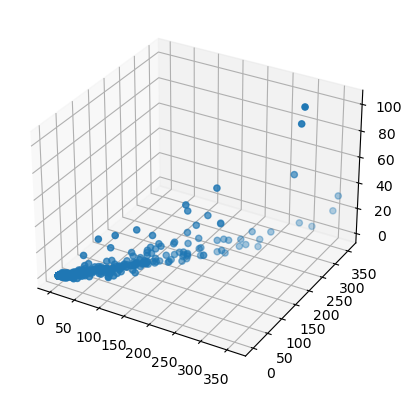

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Race_Entries'], df['Race_Starts'], df['Race_Wins'])
plt.show()

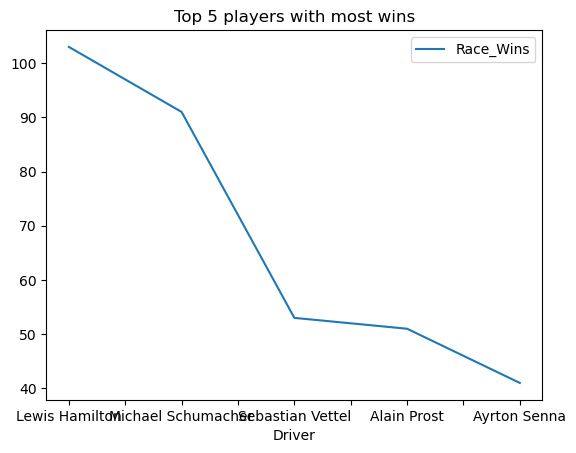

In [22]:
top5 = df.head(5)
top5.plot(x='Driver', y='Race_Wins', kind='line')
plt.title('Top 5 players with most wins')
plt.show()